In [1]:
from utils.imports import *

Using TensorFlow backend.


In [2]:
csv_path = PATH['annotations_val']
src = PATH['model_train_pred']
pred_csv_path = PATH['model_train_pred']
data_path = PATH['src_train']

In [3]:
model_paths = PATH['model_paths']
model_final = PATH['model_final']

In [4]:
model_cube_30 = load_model(model_paths + 'Fenge_32_32_32_0630.h5')

In [5]:
test_pred_0 = pd.read_csv(pred_csv_path + "1final_result.csv")

In [6]:
seriesuids = pd.read_csv(PATH['annotations_val'] + "seriesuids.csv")
test_pred_0["file"] = test_pred_0["seriesuid"].map(lambda file_name:  get_filename(seriesuids['seriesuid'].values, file_name))
test_pred_0 = test_pred_0.dropna()

In [7]:
patients = [x for x in os.listdir(pred_csv_path) if 'orig' in x]   

In [8]:
test_pred_0["file"] = test_pred_0["seriesuid"].map(lambda file_name: get_filename(patients, file_name))
test_pred_0 = test_pred_0.dropna()

In [9]:
probability_30_30_30_cube = []

average = []

for img_file in tqdm(sorted(patients)):
    mini_df_anno = test_pred_0[test_pred_0["file"]==img_file] #get all nodules associate with file
    if mini_df_anno.shape[0]>0: # some files may not have a nodule--skipping those 
        # load the data once        
        patient_id = img_file[:-9]
        img_array = np.load(src + img_file)
        pos_annos = pd.read_csv(src + img_file[:-9] + '_annos_pos.csv')
        origin = np.array([pos_annos.loc[0]['origin_x'],pos_annos.loc[0]['origin_y'],pos_annos.loc[0]['origin_z']]) 
        spacing = np.array([pos_annos.loc[0]['spacing_x'],pos_annos.loc[0]['spacing_y'],pos_annos.loc[0]['spacing_z']])
        img_array = normalize(img_array)                
        for node_idx1, cur_row1 in mini_df_anno.iterrows():       
            node_x = cur_row1["coordX"]
            node_y = cur_row1["coordY"]
            node_z = cur_row1["coordZ"]
            diam = cur_row1["diameter_mm"]
            center = np.array([node_x, node_y, node_z])   # nodule center
            v_center = np.rint(np.absolute(center-origin)/spacing)            
            new_x = int(v_center[0])
            new_y = int(v_center[1])
            new_z = int(v_center[2])
            
            
            diam = int(diam)
            z1 = np.max([new_z - 3*diam,0])
            y1 = np.max([new_y - 3*diam,0])
            x1 = np.max([new_x - 3*diam,0])
            
            z2 = np.min([new_z + 3*diam,img_array.shape[0]])
            y2 = np.min([new_y + 3*diam,img_array.shape[1]])
            x2 = np.min([new_x + 3*diam,img_array.shape[2]])

            trainX_1 = img_array[z1: z2,
                                 y1: y2,
                                 x1: x2]
            if trainX_1.shape[0] == 0 or trainX_1.shape[1] == 0 or trainX_1.shape[2] == 0:
                cls_result_cube_30 = int(0)
                print node_idx1
            else:
                trainX_cube_30 = resize(trainX_1,[32,32,32])
            
#             if new_z<16 or new_x<16 or new_y<16 or new_x+16>img_array.shape[2] or new_y+16>img_array.shape[1] or new_z+16>img_array.shape[0]:
#                 cls_result_cube_30 = int(0)
#             else:   
#                 trainX_cube_30 =  img_array[new_z - 16: new_z + 16,
#                                     new_y - 16 : new_y + 16,
#                                     new_x - 16 : new_x + 16] 
            
                trainX_cube_30=np.expand_dims(trainX_cube_30,0)
                trainX_cube_30=np.expand_dims(trainX_cube_30,0)
            
                cls_result_cube_30 = model_cube_30.predict(trainX_cube_30)[0][1]
            probability_30_30_30_cube.append(cls_result_cube_30)


100%|██████████| 800/800 [18:37<00:00,  1.40s/it]


In [10]:
probability_30_30_30_cube = np.array(probability_30_30_30_cube)
probability_30_30_30_cube = probability_30_30_30_cube.clip(0.005,0.995)
probability_30_30_30_cube = probability_30_30_30_cube.round(3)
test_pred_0['probability'] = probability_30_30_30_cube

In [11]:
test_pred_0.to_csv(main_path + "/evaluationScript/exampleFiles/val_cal.csv", index=False)

In [1]:
%run ./evaluationScript/noduleCADEvaluationLUNA16.py

/Volumes/solo/ali/evaluationScript/annotations/annotations_all.csv
adding nodule annotations: seriesuid
adding nodule annotations: LKDS-00539
adding nodule annotations: LKDS-00539
adding nodule annotations: LKDS-00539
adding nodule annotations: LKDS-00539
adding nodule annotations: LKDS-00539
adding nodule annotations: LKDS-00539
adding nodule annotations: LKDS-00539
adding nodule annotations: LKDS-00340
adding nodule annotations: LKDS-00737
adding nodule annotations: LKDS-00008
adding nodule annotations: LKDS-00685
adding nodule annotations: LKDS-00146
adding nodule annotations: LKDS-00791
adding nodule annotations: LKDS-00409
adding nodule annotations: LKDS-00311
adding nodule annotations: LKDS-00228
adding nodule annotations: LKDS-00141
adding nodule annotations: LKDS-00415
adding nodule annotations: LKDS-00210
adding nodule annotations: LKDS-00522
adding nodule annotations: LKDS-00522
adding nodule annotations: LKDS-00522
adding nodule annotations: LKDS-00522
adding nodule annotati

adding candidates: seriesuid
adding candidates: LKDS-00539
adding candidates: LKDS-00539
adding candidates: LKDS-00539
adding candidates: LKDS-00539
adding candidates: LKDS-00539
adding candidates: LKDS-00539
adding candidates: LKDS-00539
adding candidates: LKDS-00340
adding candidates: LKDS-00737
adding candidates: LKDS-00008
adding candidates: LKDS-00685
adding candidates: LKDS-00146
adding candidates: LKDS-00791
adding candidates: LKDS-00409
adding candidates: LKDS-00311
adding candidates: LKDS-00228
adding candidates: LKDS-00141
adding candidates: LKDS-00415
adding candidates: LKDS-00210
adding candidates: LKDS-00522
adding candidates: LKDS-00522
adding candidates: LKDS-00522
adding candidates: LKDS-00522
adding candidates: LKDS-00522
adding candidates: LKDS-00686
adding candidates: LKDS-00858
adding candidates: LKDS-00858
adding candidates: LKDS-00432
adding candidates: LKDS-00367
adding candidates: LKDS-00433
adding candidates: LKDS-00060
adding candidates: LKDS-00988
adding cand

computing FROC: bootstrap 2/1000
computing FROC: bootstrap 3/1000
computing FROC: bootstrap 4/1000
computing FROC: bootstrap 5/1000
computing FROC: bootstrap 6/1000
computing FROC: bootstrap 7/1000
computing FROC: bootstrap 8/1000
computing FROC: bootstrap 9/1000
computing FROC: bootstrap 10/1000
computing FROC: bootstrap 11/1000
computing FROC: bootstrap 12/1000
computing FROC: bootstrap 13/1000
computing FROC: bootstrap 14/1000
computing FROC: bootstrap 15/1000
computing FROC: bootstrap 16/1000
computing FROC: bootstrap 17/1000
computing FROC: bootstrap 18/1000
computing FROC: bootstrap 19/1000
computing FROC: bootstrap 20/1000
computing FROC: bootstrap 21/1000
computing FROC: bootstrap 22/1000
computing FROC: bootstrap 23/1000
computing FROC: bootstrap 24/1000
computing FROC: bootstrap 25/1000
computing FROC: bootstrap 26/1000
computing FROC: bootstrap 27/1000
computing FROC: bootstrap 28/1000
computing FROC: bootstrap 29/1000
computing FROC: bootstrap 30/1000
computing FROC: bootst

computing FROC: bootstrap 243/1000
computing FROC: bootstrap 244/1000
computing FROC: bootstrap 245/1000
computing FROC: bootstrap 246/1000
computing FROC: bootstrap 247/1000
computing FROC: bootstrap 248/1000
computing FROC: bootstrap 249/1000
computing FROC: bootstrap 250/1000
computing FROC: bootstrap 251/1000
computing FROC: bootstrap 252/1000
computing FROC: bootstrap 253/1000
computing FROC: bootstrap 254/1000
computing FROC: bootstrap 255/1000
computing FROC: bootstrap 256/1000
computing FROC: bootstrap 257/1000
computing FROC: bootstrap 258/1000
computing FROC: bootstrap 259/1000
computing FROC: bootstrap 260/1000
computing FROC: bootstrap 261/1000
computing FROC: bootstrap 262/1000
computing FROC: bootstrap 263/1000
computing FROC: bootstrap 264/1000
computing FROC: bootstrap 265/1000
computing FROC: bootstrap 266/1000
computing FROC: bootstrap 267/1000
computing FROC: bootstrap 268/1000
computing FROC: bootstrap 269/1000
computing FROC: bootstrap 270/1000
computing FROC: boot

computing FROC: bootstrap 478/1000
computing FROC: bootstrap 479/1000
computing FROC: bootstrap 480/1000
computing FROC: bootstrap 481/1000
computing FROC: bootstrap 482/1000
computing FROC: bootstrap 483/1000
computing FROC: bootstrap 484/1000
computing FROC: bootstrap 485/1000
computing FROC: bootstrap 486/1000
computing FROC: bootstrap 487/1000
computing FROC: bootstrap 488/1000
computing FROC: bootstrap 489/1000
computing FROC: bootstrap 490/1000
computing FROC: bootstrap 491/1000
computing FROC: bootstrap 492/1000
computing FROC: bootstrap 493/1000
computing FROC: bootstrap 494/1000
computing FROC: bootstrap 495/1000
computing FROC: bootstrap 496/1000
computing FROC: bootstrap 497/1000
computing FROC: bootstrap 498/1000
computing FROC: bootstrap 499/1000
computing FROC: bootstrap 500/1000
computing FROC: bootstrap 501/1000
computing FROC: bootstrap 502/1000
computing FROC: bootstrap 503/1000
computing FROC: bootstrap 504/1000
computing FROC: bootstrap 505/1000
computing FROC: boot

computing FROC: bootstrap 714/1000
computing FROC: bootstrap 715/1000
computing FROC: bootstrap 716/1000
computing FROC: bootstrap 717/1000
computing FROC: bootstrap 718/1000
computing FROC: bootstrap 719/1000
computing FROC: bootstrap 720/1000
computing FROC: bootstrap 721/1000
computing FROC: bootstrap 722/1000
computing FROC: bootstrap 723/1000
computing FROC: bootstrap 724/1000
computing FROC: bootstrap 725/1000
computing FROC: bootstrap 726/1000
computing FROC: bootstrap 727/1000
computing FROC: bootstrap 728/1000
computing FROC: bootstrap 729/1000
computing FROC: bootstrap 730/1000
computing FROC: bootstrap 731/1000
computing FROC: bootstrap 732/1000
computing FROC: bootstrap 733/1000
computing FROC: bootstrap 734/1000
computing FROC: bootstrap 735/1000
computing FROC: bootstrap 736/1000
computing FROC: bootstrap 737/1000
computing FROC: bootstrap 738/1000
computing FROC: bootstrap 739/1000
computing FROC: bootstrap 740/1000
computing FROC: bootstrap 741/1000
computing FROC: boot

computing FROC: bootstrap 950/1000
computing FROC: bootstrap 951/1000
computing FROC: bootstrap 952/1000
computing FROC: bootstrap 953/1000
computing FROC: bootstrap 954/1000
computing FROC: bootstrap 955/1000
computing FROC: bootstrap 956/1000
computing FROC: bootstrap 957/1000
computing FROC: bootstrap 958/1000
computing FROC: bootstrap 959/1000
computing FROC: bootstrap 960/1000
computing FROC: bootstrap 961/1000
computing FROC: bootstrap 962/1000
computing FROC: bootstrap 963/1000
computing FROC: bootstrap 964/1000
computing FROC: bootstrap 965/1000
computing FROC: bootstrap 966/1000
computing FROC: bootstrap 967/1000
computing FROC: bootstrap 968/1000
computing FROC: bootstrap 969/1000
computing FROC: bootstrap 970/1000
computing FROC: bootstrap 971/1000
computing FROC: bootstrap 972/1000
computing FROC: bootstrap 973/1000
computing FROC: bootstrap 974/1000
computing FROC: bootstrap 975/1000
computing FROC: bootstrap 976/1000
computing FROC: bootstrap 977/1000
computing FROC: boot

In [2]:
result = plt.imread('/Volumes/solo/ali/evaluationScript/froc_val_cal.png')

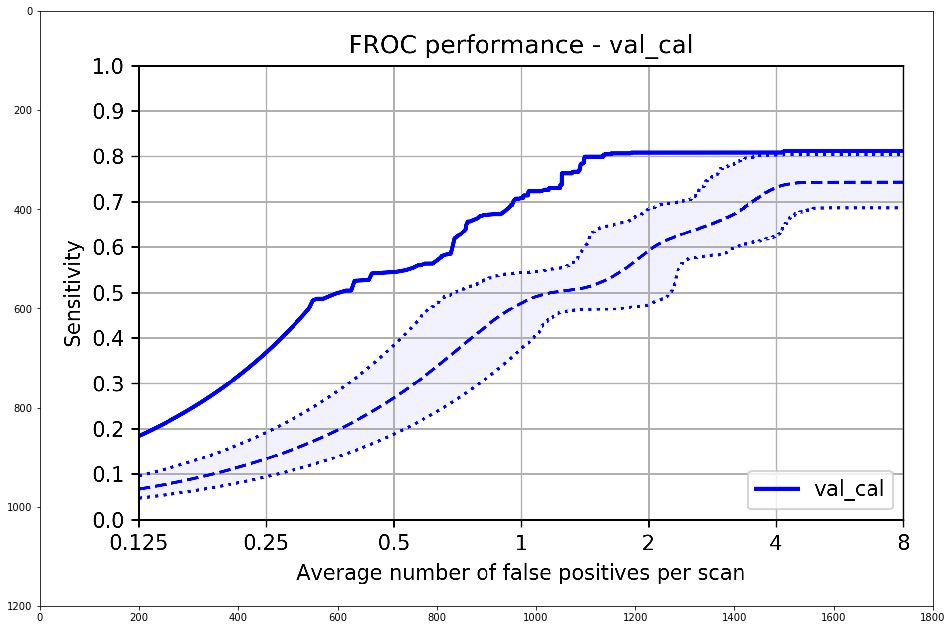

In [3]:
%matplotlib inline
plt.figure(num='result',figsize=(16,16))
plt.imshow(result)